In [1]:
# imports
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

We start by loading a dict-like object from `sklearn` which contains data from the Iris dataset.

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The most important parts for our use case are the _features_ which are a list of measurements of each flower and _targets_ which are numbers indicating the type of flower. Both of these are stored as numpy arrays. Our first step will be to combine them into a table and display the first few rows.

In [3]:
# Displaying the dimensions
features = iris.data
targets = iris.target
f'features shape: {features.shape}, targets shape: {targets.shape}'

'features shape: (150, 4), targets shape: (150,)'

Currently, the targets are numbers in ${0,1,2}$ indicating the class of flowers. To make the data easier to look at, we'll use some numpy magic to convert each number to its class name.

In [6]:
class_names = np.expand_dims(iris.target_names[targets], axis=-1) # convert numbers to names
class_names[0].item() # show the first row

'setosa'

Finally, we can look at our data

In [9]:
column_names = iris.feature_names + ['Class'] # column names 
data = np.concatenate([features, class_names], axis=1) # combine data into one big array
pd.DataFrame(data=data, columns=column_names).sample(5) # show 5 random rows from the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
54,6.5,2.8,4.6,1.5,versicolor
96,5.7,2.9,4.2,1.3,versicolor
104,6.5,3.0,5.8,2.2,virginica
21,5.1,3.7,1.5,0.4,setosa
147,6.5,3.0,5.2,2.0,virginica


To get a better idea of what our data looks like, let's plot the data for two columns: sepal width and sepal length. Also, let's just look at the Setosa and Versicolor classes to keep things simple.

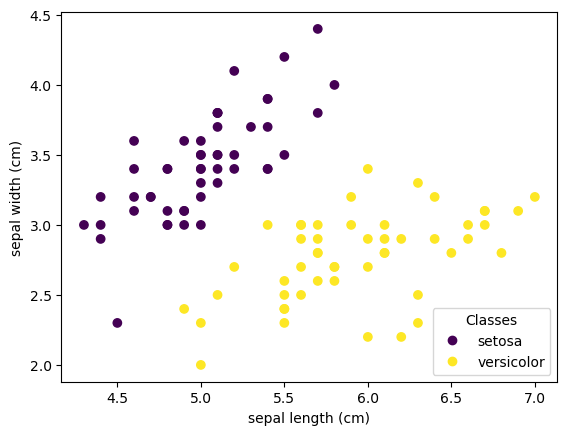

In [10]:
indices = iris.target != 2 # only keep targets where target is 0 or 1 (ie. Setosa and Versicolor)
sepal_lengths = features[:,0][indices] # take first column of dataset
sepal_widths = features[:,1][indices] # take second column of dataset
c = iris.target[indices] # only keep targets where target is 0 or 1 (ie. Setosa and Versicolor)
c
_, ax = plt.subplots()
scatter = ax.scatter(x=sepal_lengths, y=sepal_widths, c=c)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names[:2], loc="lower right", title="Classes"
)